In [44]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_gradle
import rq_aux
import matplotlib.pyplot as plt
import os
importlib.reload(regex_gradle)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [45]:
regex = regex_gradle
plugins = regex.plugins
categories = regex.categories
categories_short = regex.categories_short
build_tool = "gradle"
noerror = False
output_path = "../data/output_data/"
#overview_dataset = f"{output_path}overview_daylight_noerror.csv"
#alltasks_dataset = f"{output_path}all_tasks_noerror.csv"

overview_dataset = f"{output_path}overview_cloc2_noerror.csv"
alltasks_dataset = f"{output_path}all_tasks_cloc2_noerror.csv"
analysis_output = "figures"
os.makedirs(analysis_output, exist_ok=True)


In [46]:
rq_aux.check_categories(regex)

In [47]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Build tool gradle = 46022


In [48]:
tasks_energy_category = {}
tasks_energy_category['all'] = rq_aux.field_by_cat(df, 'energy', plugins, categories)

for x in sizes1:
    tasks_energy_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'energy', plugins, categories)

In [49]:
tasks_time_category = {}
tasks_time_category['all'] = rq_aux.field_by_cat(df, 'seconds', plugins, categories)

for x in sizes1:
    tasks_time_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'seconds', plugins, categories)

In [50]:
tasks_power_category = {}
tasks_power_category['all'] = rq_aux.power_by_cat(df, plugins, categories)

for x in sizes1:
    tasks_power_category[x] = rq_aux.power_by_cat(df[df["size"] == x], plugins, categories)

In [51]:
total_energy = 0
total_power = 0
for x in sizes1:
  for key, value in tasks_energy_category[x].items():
    total_energy += len(value)
    
  for key, value in tasks_power_category[x].items():
    total_power += len(value)

assert total_energy == len(df)
assert total_power == len(df)

In [52]:
total_energy = 0
total_power = 0
for key, value in tasks_energy_category['all'].items():
    print(key, len(value))
    total_energy += len(value)
    
for key, value in tasks_power_category['all'].items():
    print(key, len(value))
    total_power += len(value)


assert total_energy == len(df)
assert total_power == len(df)

Integration Test 262
Unit Test 2585
Compile 8790
Documentation 1890
Install 114
Linter 4060
Packaging 11579
Others 3333
Unclassified 13409
Integration Test 262
Unit Test 2585
Compile 8790
Documentation 1890
Install 114
Linter 4060
Packaging 11579
Others 3333
Unclassified 13409


In [53]:
rq_aux.calc_category_kruskall_mwu(tasks_time_category['all'])

Category: Integration Test, N: 262, median: 1599778.500
Category: Unit Test, N: 2585, median: 1796994.000
Category: Compile, N: 8790, median: 699345.500
Category: Documentation, N: 1890, median: 199531.500
Category: Install, N: 114, median: 1650318.500
Category: Linter, N: 4060, median: 799591.000
Category: Packaging, N: 11579, median: 501348.000
Category: Others, N: 3333, median: 199963.000
Category: Unclassified, N: 13409, median: 199932.000

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=3181.9622963634324, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (0.262)
Integration Test x Documentation: Cliff large (0.479)
Integration Test x Install: EQUAL
Integration Test x Linter: Cliff small (0.245)
Integration Test x Packaging: Cliff medium (0.334)
Integration Te

In [54]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['all'])

Category: Integration Test, N: 262, median: 41.074
Category: Unit Test, N: 2585, median: 42.554
Category: Compile, N: 8790, median: 18.118
Category: Documentation, N: 1890, median: 11.590
Category: Install, N: 114, median: 25.178
Category: Linter, N: 4060, median: 18.475
Category: Packaging, N: 11579, median: 17.619
Category: Others, N: 3333, median: 11.577
Category: Unclassified, N: 13409, median: 9.132

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=4458.472515048255, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (0.199)
Integration Test x Documentation: Cliff medium (0.438)
Integration Test x Install: Cliff negligible (0.134)
Integration Test x Linter: Cliff small (0.172)
Integration Test x Packaging: Cliff small (0.291)
Integration Test x Others: Cliff med

In [55]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['all'])

Category: Integration Test, N: 262, median: 0.028
Category: Unit Test, N: 2585, median: 0.031
Category: Compile, N: 8790, median: 0.032
Category: Documentation, N: 1890, median: 0.033
Category: Install, N: 114, median: 0.025
Category: Linter, N: 4060, median: 0.034
Category: Packaging, N: 11579, median: 0.032
Category: Others, N: 3333, median: 0.033
Category: Unclassified, N: 13409, median: 0.028

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=1214.7844792831165, pvalue=6.127809329967897e-257)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff negligible (-0.145)
Integration Test x Compile: Cliff small (-0.248)
Integration Test x Documentation: Cliff small (-0.292)
Integration Test x Install: EQUAL
Integration Test x Linter: Cliff small (-0.294)
Integration Test x Packaging: Cliff small (-0.230)
Integration Test x O

In [56]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['small'])

Category: Integration Test, N: 0, median: nan
Category: Unit Test, N: 73, median: 52.567
Category: Compile, N: 101, median: 22.686
Category: Documentation, N: 23, median: 3.434
Category: Install, N: 5, median: 12.546
Category: Linter, N: 117, median: 16.259
Category: Packaging, N: 311, median: 16.641
Category: Others, N: 69, median: 36.708
Category: Unclassified, N: 510, median: 15.749

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']

KruskalResult(statistic=60.81251549294984, pvalue=1.0387898417248872e-10)
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff small (0.176)
Unit Test x Documentation: Cliff medium (0.471)
Unit Test x Install: EQUAL
Unit Test x Linter: Cliff medium (0.408)
Unit Test x Packaging: Cliff medium (0.406)
Unit Test x Others: EQUAL
Unit Test x Unclassified: Cliff medium (0.401)

Compile x Unit Test: Cliff small (-0.176)
Compile x Compile: EQUAL

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Install x Unclassified: EQUAL

Linter x Unit Test: Cliff medium (-0.408)
Linter x Compile: Cliff small (-0.256)
Linter x Documentation: EQUAL
Linter x Install: EQUAL
Linter x Linter: EQUAL
Linter x Packaging: EQUAL
Linter x Others: Cliff small (-0.292)
Linter x Unclassified: EQUAL

Packaging x Unit Test: Cliff medium (-0.406)
Packaging x Compile: Cliff small (-0.222)
Packaging x Documentation: EQUAL
Packaging x Install: EQUAL
Packaging x Linter: EQUAL
Packaging x Packaging: EQUAL
Packaging x Others: Cliff small (-0.262)
Packaging x Unclassified: EQUAL

Others x Unit Test: EQUAL
Others x Compile: EQUAL
Others x Documentation: Cliff medium (0.394)
Others x Install: EQUAL
Others x Linter: Cliff small (0.292)
Others x Packaging: Cliff small (0.262)
Others x Others: EQUAL
Others x Unclassified: Cliff small (0.300)

Unclassified x Unit Test: Cliff medium (-0.401)
Unclassified x Compile: Cliff small (-0.238)
Unclassified x Documentation: EQUAL
Unclassified x Install: EQUAL
Unclassified x Lint

In [57]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['small'])

Category: Integration Test, N: 0, median: nan
Category: Unit Test, N: 73, median: 0.025
Category: Compile, N: 101, median: 0.030
Category: Documentation, N: 23, median: 0.030
Category: Install, N: 5, median: 0.009
Category: Linter, N: 117, median: 0.033
Category: Packaging, N: 311, median: 0.030
Category: Others, N: 69, median: 0.029
Category: Unclassified, N: 510, median: 0.032

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']

KruskalResult(statistic=41.344136199453715, pvalue=6.95289678506049e-07)
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff small (-0.228)
Unit Test x Documentation: EQUAL
Unit Test x Install: EQUAL
Unit Test x Linter: Cliff medium (-0.446)
Unit Test x Packaging: Cliff small (-0.251)
Unit Test x Others: Cliff small (-0.225)
Unit Test x Unclassified: Cliff medium (-0.349)

Compile x Unit Test: Cliff small (0.228)
Compile x Compile: EQUAL
Compi

In [58]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['medium'])

Category: Integration Test, N: 168, median: 16.950
Category: Unit Test, N: 1227, median: 30.371
Category: Compile, N: 3146, median: 17.626
Category: Documentation, N: 765, median: 13.028
Category: Install, N: 43, median: 18.084
Category: Linter, N: 2359, median: 33.732
Category: Packaging, N: 4808, median: 17.828
Category: Others, N: 1433, median: 16.239
Category: Unclassified, N: 3003, median: 15.007

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=541.090871949018, pvalue=1.0641529109784697e-111)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: EQUAL
Integration Test x Documentation: Cliff small (0.306)
Integration Test x Install: EQUAL
Integration Test x Linter: EQUAL
Integration Test x Packaging: EQUAL
Integration Test x Others: Cliff small (0.158)
Integration Test x Unclassified: Cl

In [59]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['medium'])

Category: Integration Test, N: 168, median: 0.031
Category: Unit Test, N: 1227, median: 0.029
Category: Compile, N: 3146, median: 0.033
Category: Documentation, N: 765, median: 0.032
Category: Install, N: 43, median: 0.028
Category: Linter, N: 2359, median: 0.033
Category: Packaging, N: 4808, median: 0.032
Category: Others, N: 1433, median: 0.034
Category: Unclassified, N: 3003, median: 0.034

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=190.42319870703068, pvalue=6.634383044475951e-37)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (-0.190)
Integration Test x Documentation: Cliff small (-0.171)
Integration Test x Install: EQUAL
Integration Test x Linter: Cliff small (-0.209)
Integration Test x Packaging: Cliff small (-0.163)
Integration Test x Others: Cliff small (-0.27

In [60]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['large'])

Category: Integration Test, N: 94, median: 129.671
Category: Unit Test, N: 1285, median: 71.901
Category: Compile, N: 5543, median: 18.216
Category: Documentation, N: 1102, median: 10.917
Category: Install, N: 66, median: 36.826
Category: Linter, N: 1584, median: 18.044
Category: Packaging, N: 6460, median: 17.243
Category: Others, N: 1831, median: 7.742
Category: Unclassified, N: 9896, median: 7.810

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=4005.5193438278948, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (0.149)
Integration Test x Compile: Cliff large (0.486)
Integration Test x Documentation: Cliff large (0.669)
Integration Test x Install: Cliff medium (0.382)
Integration Test x Linter: Cliff large (0.502)
Integration Test x Packaging: Cliff large (0.617)
Integration Test x Others: Cli

In [61]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['large'])

Category: Integration Test, N: 94, median: 0.025
Category: Unit Test, N: 1285, median: 0.032
Category: Compile, N: 5543, median: 0.032
Category: Documentation, N: 1102, median: 0.033
Category: Install, N: 66, median: 0.024
Category: Linter, N: 1584, median: 0.034
Category: Packaging, N: 6460, median: 0.032
Category: Others, N: 1831, median: 0.032
Category: Unclassified, N: 9896, median: 0.025

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=1538.8452423338458, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff medium (-0.344)
Integration Test x Compile: Cliff medium (-0.372)
Integration Test x Documentation: Cliff medium (-0.457)
Integration Test x Install: EQUAL
Integration Test x Linter: Cliff medium (-0.427)
Integration Test x Packaging: Cliff medium (-0.357)
Integration Test x Others: Cliff medium (-0

Text(0, 0.5, 'Energy (Joules)')

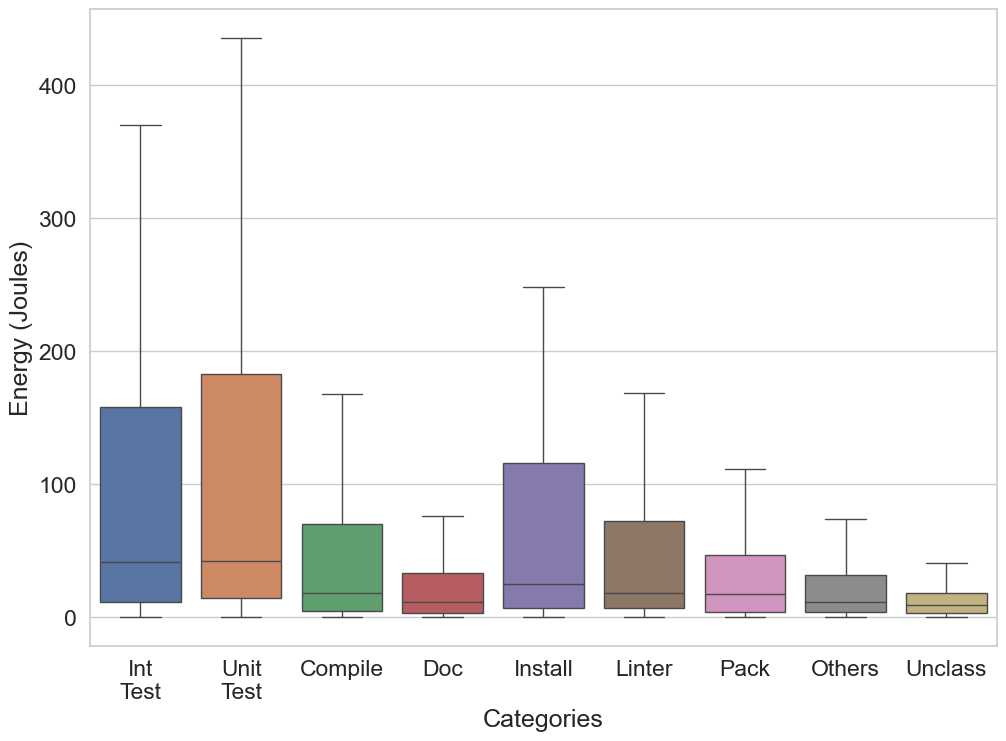

In [62]:
import scipy.stats as stats
from cliffs_delta import cliffs_delta
import seaborn as sns
energy_plot = {}
for key, value in tasks_energy_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    energy_plot[new_key] = value
sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = energy_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Energy (Joules)')


#g.set_yscale("log")

Text(0, 0.5, 'Power (Watts)')

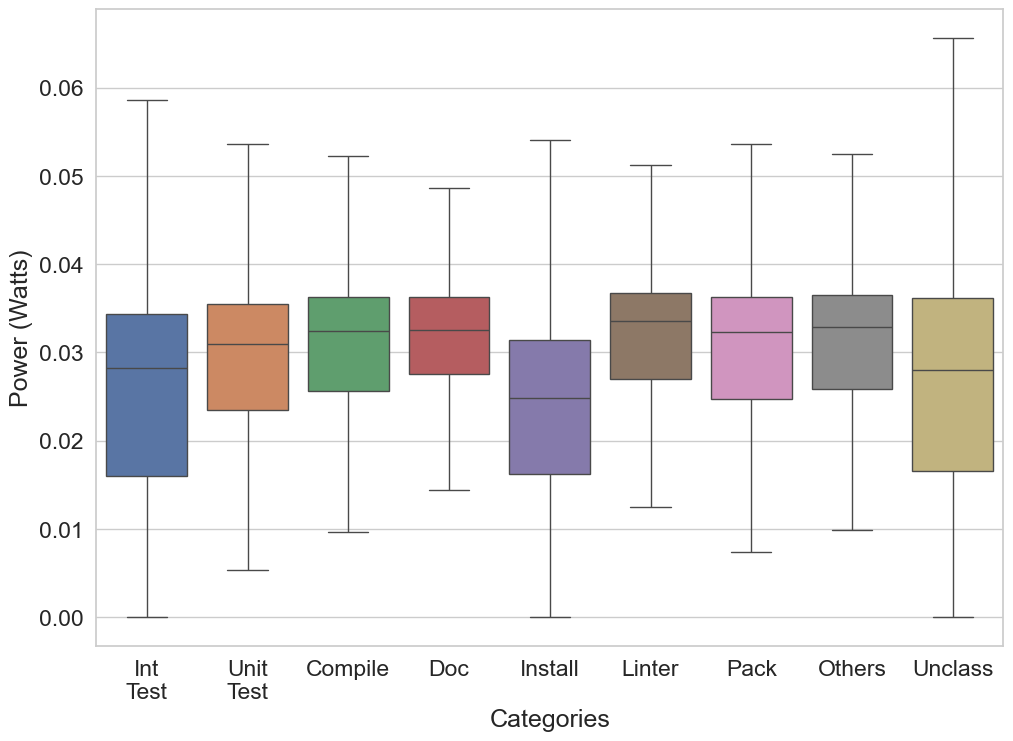

In [63]:
power_plot = {}
for key, value in tasks_power_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    power_plot[new_key] = value

sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = power_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Power (Watts)')

#g.set_yscale("log")